## GRIP @ The Sparks Foundation


## Coder : Nandini Kumari ( Data Science & Business Analytics Intern )


### Task 2 : Color Identification In Images ( Computer Vision Domain )


## Problem Statement


Implement an image color detector which identifies all the colors in an image or video.

## Import all required libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## Applying Various OpenCV functions

The type of this input is <class 'numpy.ndarray'>
Shape: (1333, 1000, 3)


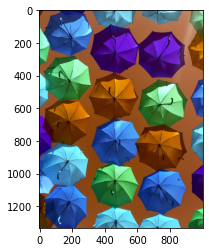

In [3]:
image = cv2.imread('D:\img\Demo1.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## BGR to RGB Image Conversion

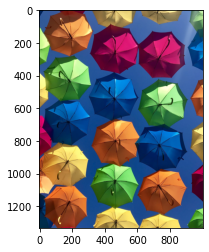

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## BGR to Grayscale Image Conversion

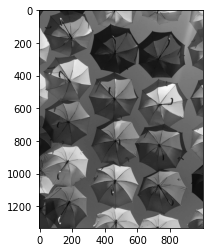

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

## RBG to HEX Conversion Function

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

## Function For Fetching Image in RGB Colorspace

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## Fetching Colors From Images

In [8]:
def get_colors(image, number_of_colors, show_chart):
    
 modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
 modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
 clf = KMeans(n_clusters = number_of_colors)
 labels = clf.fit_predict(modified_image)
    
 counts = Counter(labels)

 center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
 ordered_colors = [center_colors[i] for i in counts.keys()]
 hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
 rgb_colors = [ordered_colors[i] for i in counts.keys()]

 if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

 return rgb_colors

## Image Dict For Further Color Searching

In [10]:
IMAGE_DIRECTORY = 'D:\img'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED' : [255, 0, 0],
    'PURPLE' : [128, 0, 128]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

## Plot List Of Several Images

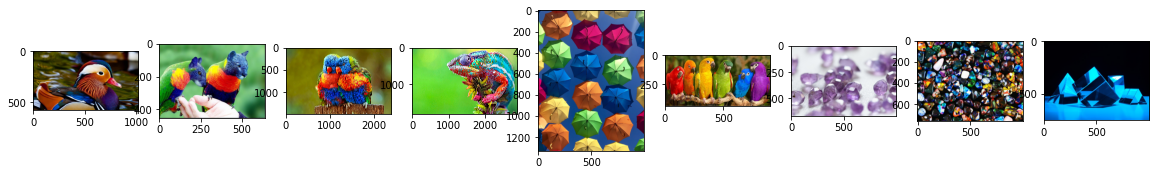

In [11]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

## Function For Matching Image By Different Colors

In [12]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

## Function For Showing Selected Images

In [13]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

## Search Images Which Contain Purple Color

ValueError: num must be 1 <= num <= 5, not 6

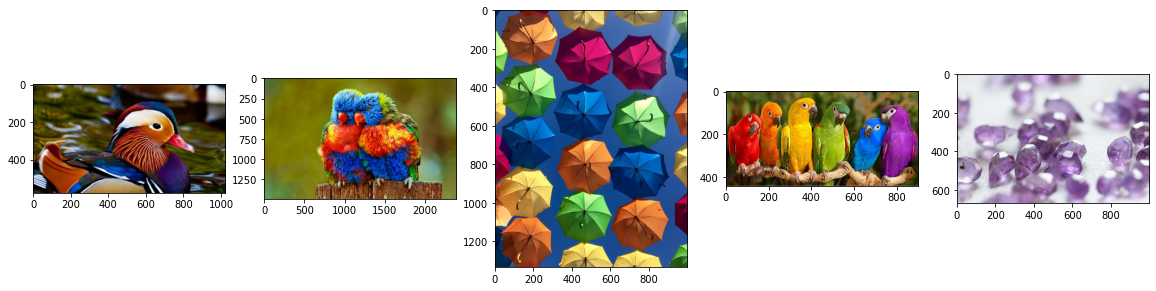

In [15]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['PURPLE'], 60, 5)

## Search Images Which Contain Red Color

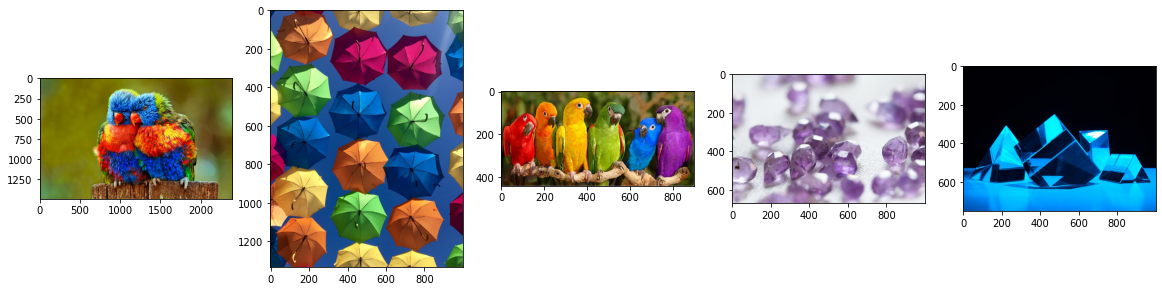

In [16]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

## Search Images Which Contain Green Color

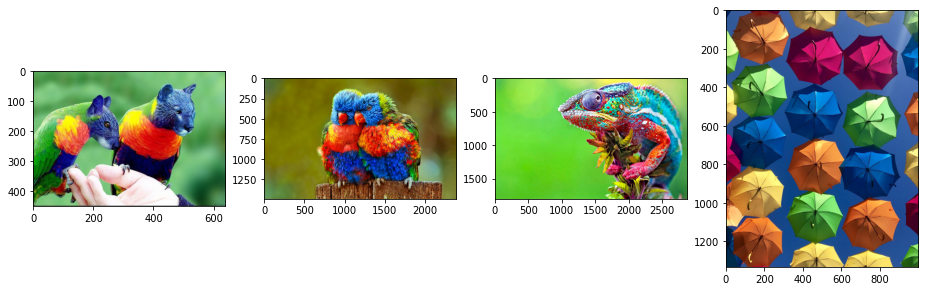

In [17]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

## Search Images Which Contain Yellow Color

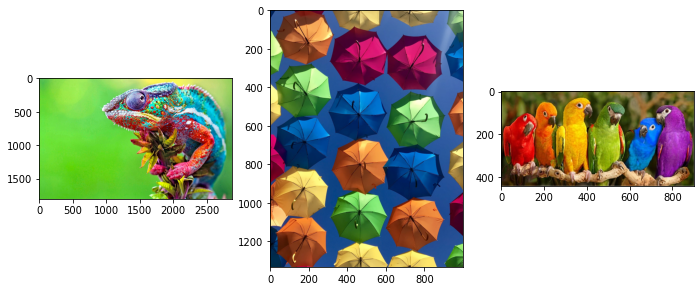

In [18]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

## Get All Colors From Demo1 Image

[array([ 3.37633221, 36.70484878, 86.66793087]),
 array([149.90923008, 119.04916704,  67.05150833]),
 array([233.55079381, 162.84766728,  77.21155157]),
 array([128.74011345,  55.32575697,  26.49924103]),
 array([ 91.35395995, 166.45354501,  78.76005773]),
 array([207.91907938, 115.72014953,  52.89577072]),
 array([ 42.50465681,  84.17864615, 150.10015523]),
 array([146.13459596, 226.47474747, 124.47209596]),
 array([ 76.77736293, 112.87125769, 175.56060292]),
 array([ 43.35799844, 101.90121856,  35.80140005]),
 array([246.91484145, 221.12692056, 115.13689114]),
 array([  2.23986367, 115.09531085, 200.77106593]),
 array([84.96919968,  8.62305342, 46.86807609]),
 array([ 14.94425632,  70.59342091, 137.18539054]),
 array([210.06529699, 250.53193653, 166.47945484]),
 array([199.08730159,  22.9589418 , 103.50719577])]

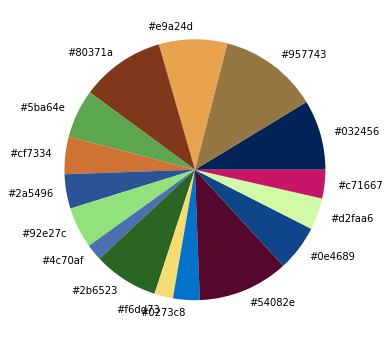

In [19]:
get_colors(get_image('D:\img\Demo1.jpg'),16 , True)

## Applying Some OpenCV functions

The type of this input is <class 'numpy.ndarray'>
Shape: (1333, 1000, 3)


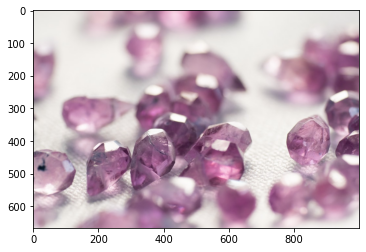

In [20]:
image1 = cv2.imread('D:\img\stone 2.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image1)

## BGR to RGB Image Conversion

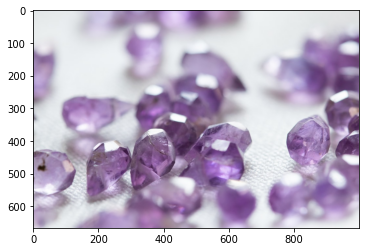

In [21]:
image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image2)

## Get All Colors From Stone Image

[array([216.02432954, 214.88576798, 225.78022145]),
 array([167.88856137, 138.76091051, 189.2321297 ]),
 array([146.30985755, 124.05253561, 153.99487179]),
 array([204.16406072, 197.22580461, 216.73305181]),
 array([124.75858957,  91.11647116, 139.05927674]),
 array([78.21618123, 47.28543689, 85.33495146]),
 array([236.6402216 , 239.92121063, 242.70940451]),
 array([184.60647297, 161.3339463 , 205.82475175]),
 array([227.39230524, 230.27075351, 234.26395275]),
 array([112.39679359,  78.43687375, 125.48592838]),
 array([ 97.41928281,  66.24156049, 106.76238014]),
 array([136.85766113, 103.44770359, 154.5928213 ]),
 array([174.68689269, 160.88227892, 186.38853548]),
 array([153.43716698, 119.48528568, 173.47061235]),
 array([161.06154099, 142.57438254, 170.75637975]),
 array([190.5862584 , 182.48373956, 201.6831421 ])]

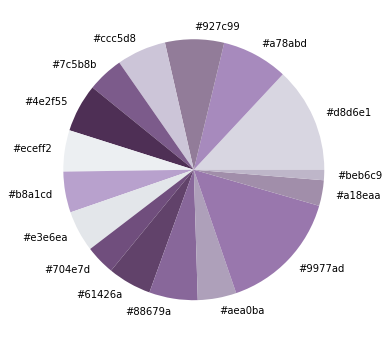

In [22]:
get_colors(get_image('D:\img\stone 2.jpg'),16 , True)

# The code ends here..

## Thanks